# DSCI 100 Group Project



## Introduction

We are using data on the top 500 tennis players. We will try to predict a player's prize money based on variables such as rank, number of seasons, age, and current points. The dataset we will be using is "Player Stats for Top 500 Players" from https://www.ultimatetennisstatistics.com/.

## Methods & Results

**Reading Data**

The first step in our analysis was to load in the libraries necessary to read the data.

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

We then used the read_csv function to view our data from its original web source.

In [2]:
player_stats<-read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")
player_stats

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


**Tidying**

The next step was to tidy our data. This dataset includes columns with useless characters, more than one value, and other problems that would mess up our analysis. 

First, we used the make.names function to remove spaces from the column names.

In [3]:
colnames(player_stats) <- make.names(colnames(player_stats)) #Removing spaces from column names

Next, we used the gsub funciton to remove useless characters in certain cells. 

In [4]:
player_stats$Prize.Money<-gsub("\\$","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub("US","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub("\\$ ","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub(",","",as.character(player_stats$Prize.Money))
player_stats$Prize.Money<-gsub(" .*","",as.character(player_stats$Prize.Money))
player_stats$Current.Rank<-gsub("\\(","",as.character(player_stats$Current.Rank))
player_stats$Current.Rank<-gsub("\\)","",as.character(player_stats$Current.Rank))
player_stats$Current.Elo.Rank<-gsub("\\)","",as.character(player_stats$Current.Elo.Rank))
player_stats$Current.Elo.Rank<-gsub("\\(","",as.character(player_stats$Current.Elo.Rank))
player_stats$Height<-gsub("cm","",as.character(player_stats$Height))

We then separated cells with more than one value in them.

In [5]:
player_stats_tidy <- player_stats%>%
    separate(col = Age, into = c("Age", "DOB"),sep = " ") %>%
    separate(col = Best.Rank, into = c("Best.Rank", "Best.Rank.Date"), sep = " ") %>%
    separate(col = Best.Elo.Rank, into = c("Best.Elo.Rank", "Best.Elo.Rank.Date"), sep = " ") %>%
    separate(col = Peak.Elo.Rating, into = c("Peak.Elo.Rating", "Peak.Elo.Rating.Date"), sep = " ") %>%
    separate(col = Current.Elo.Rank,into = c("Current.Elo.Rank", "Current.Elo.Rating"), sep = " ") %>%
    separate(col = Current.Rank,into = c("Current.Rank", "Current.Points"), sep = " ")

The column names needed to be doubles for our analysis, so we used as.numeric to change them. 

In [6]:
player_stats_tidy$Prize.Money<-as.numeric(player_stats_tidy$Prize.Money)
player_stats_tidy$Age<-as.numeric(player_stats_tidy$Age)
player_stats_tidy$Height<-as.numeric(player_stats_tidy$Height)
player_stats_tidy$Best.Rank<-as.numeric(player_stats_tidy$Best.Rank)
player_stats_tidy$Best.Elo.Rank<-as.numeric(player_stats_tidy$Best.Elo.Rank)
player_stats_tidy$Peak.Elo.Rating<-as.numeric(player_stats_tidy$Peak.Elo.Rating)
player_stats_tidy$Current.Elo.Rank<-as.numeric(player_stats_tidy$Current.Elo.Rank)
player_stats_tidy$Current.Elo.Rating<-as.numeric(player_stats_tidy$Current.Elo.Rating)
player_stats_tidy$Current.Rank<-as.numeric(player_stats_tidy$Current.Rank)
player_stats_tidy$Current.Points<-as.numeric(player_stats_tidy$Current.Points)
player_stats_tidy$Seasons<-as.numeric(player_stats_tidy$Seasons)
player_stats_tidy <- player_stats_tidy[complete.cases(player_stats_tidy[, "Prize.Money"]),]

Lastly, we removed any columns without numeric values, as these weren't of any use in our analysis.

In [7]:
predictors = c("Age","Height", "Current.Points", "Current.Rank", "Best.Rank", "Current.Elo.Rank", "Current.Elo.Rating", "Best.Elo.Rank", "Peak.Elo.Rating", "Seasons")
player_stats_num<-player_stats_tidy %>%
    select(Prize.Money, all_of(predictors))

We set the seed to make sure that our analysis is replicable.

In [8]:
set.seed(2022)

**Visualization**

Now that our data is tidy, we are able to visualize. 

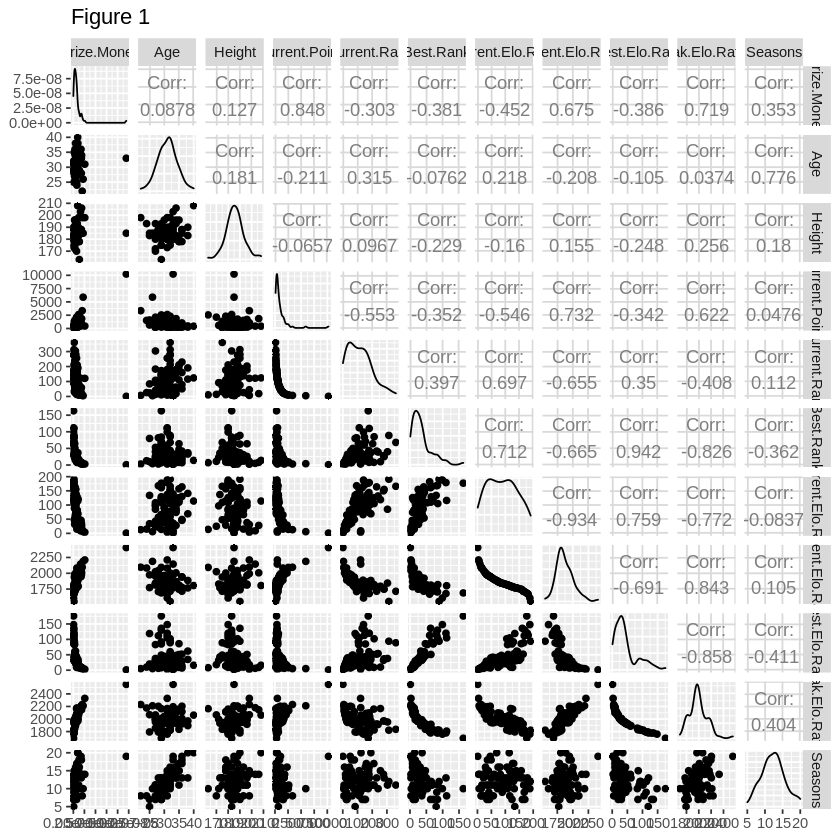

In [9]:
ggpair_plot<-player_stats_num%>%
            na.omit()%>%
            ggpairs() +
            ggtitle("Figure 1")
ggpair_plot

From our visualization, we could see that the following factors have a high correlation (|correlation|>0.9):
Current Elo Rank & Current Elo Rating
Best Elo Rank & Peak Elo Rating
This makes sense since they mean the same thing. We kept rating over Rank since it gives more information.

We then selected the best predictors, and visualized these. 

Rows: 215
Columns: 5
$ Prize.Money     <dbl> 3261567, 6091971, 1517157, 122734, 1893476, 303458, 2…
$ Age             <dbl> 32, 27, 22, 25, 19, 28, 31, 20, 22, 33, 32, 30, 30, 3…
$ Current.Points  <dbl> 280, 273, 1398, 81, 1701, 359, 460, 959, 1335, 417, 1…
$ Peak.Elo.Rating <dbl> 1886, 2037, 1983, 1603, 1992, 1744, 2329, 1908, 1999,…
$ Seasons         <dbl> 14, 11, 5, 5, 3, 8, 14, 3, 6, 14, 15, 7, 7, 3, 16, 11…


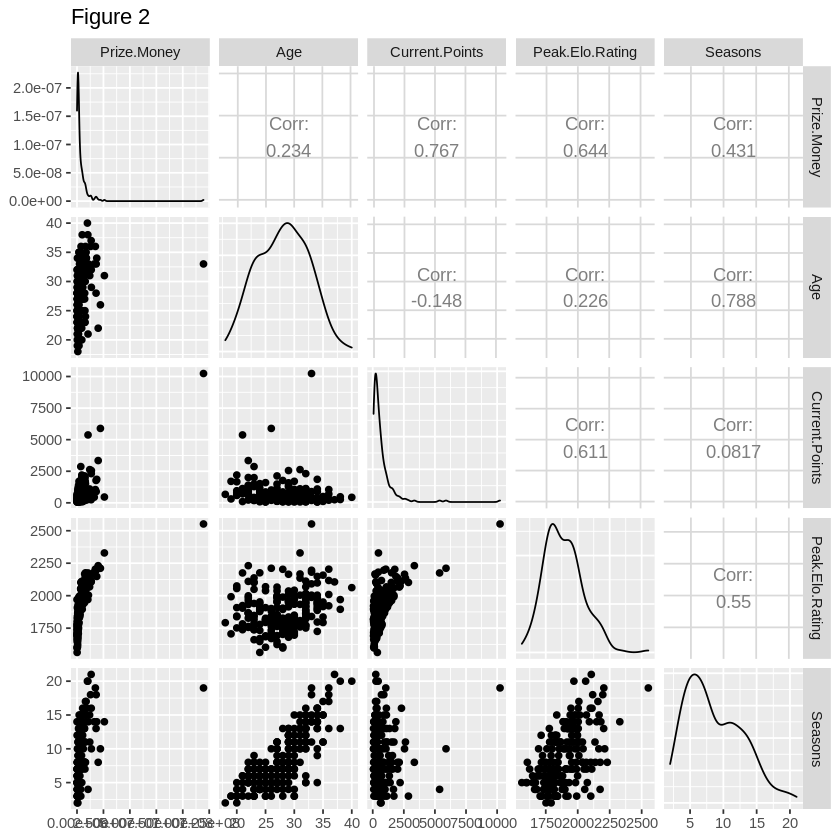

In [10]:
selected_predictors = c("Age", "Current.Points", "Peak.Elo.Rating", "Seasons")
player_stats_short = player_stats_num%>%
                    select(Prize.Money, all_of(selected_predictors)) %>%
                    na.omit()
glimpse(player_stats_short)

ggpair_plot_2<-player_stats_short%>%
    ggpairs() +
    ggtitle("Figure 2")

ggpair_plot_2

**Creating A Model**

Next, we split our data into a training and testing set.

In [11]:
player_stats_split <- initial_split(player_stats_short, prop = 0.75, strata = Prize.Money)
player_stats_training <- training(player_stats_split)
player_stats_testing <- testing(player_stats_split)

With our training set, we created a knn model, and chose the best k number of neighbors for our data.

In [12]:
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
       set_engine("kknn") %>%
       set_mode("regression") 

player_recipe <- recipe(Prize.Money ~ ., data = player_stats_training) %>%
       step_scale(all_predictors()) %>%
       step_center(all_predictors())

player_vfold = vfold_cv(player_stats_training, v = 5, strata = Prize.Money)

player_workflow = workflow() %>%
       add_recipe(player_recipe) %>%
        add_model(player_spec)

gridvals = tibble(neighbors = seq(1, 50))

player_results = player_workflow %>%
                    tune_grid(resamples = player_vfold, grid = gridvals) %>%
                    collect_metrics() 
player_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,2.594412e+06,5,4.535898e+05,Model01
1,rsq,standard,6.622696e-01,5,8.734272e-02,Model01
2,rmse,standard,2.454606e+06,5,4.862048e+05,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,rsq,standard,7.266912e-01,5,2.516032e-02,Model49
50,rmse,standard,3.201910e+06,5,4.414905e+05,Model50
50,rsq,standard,7.215135e-01,5,2.559193e-02,Model50


To choose the best k, we created a graph to compare each k's rmse.

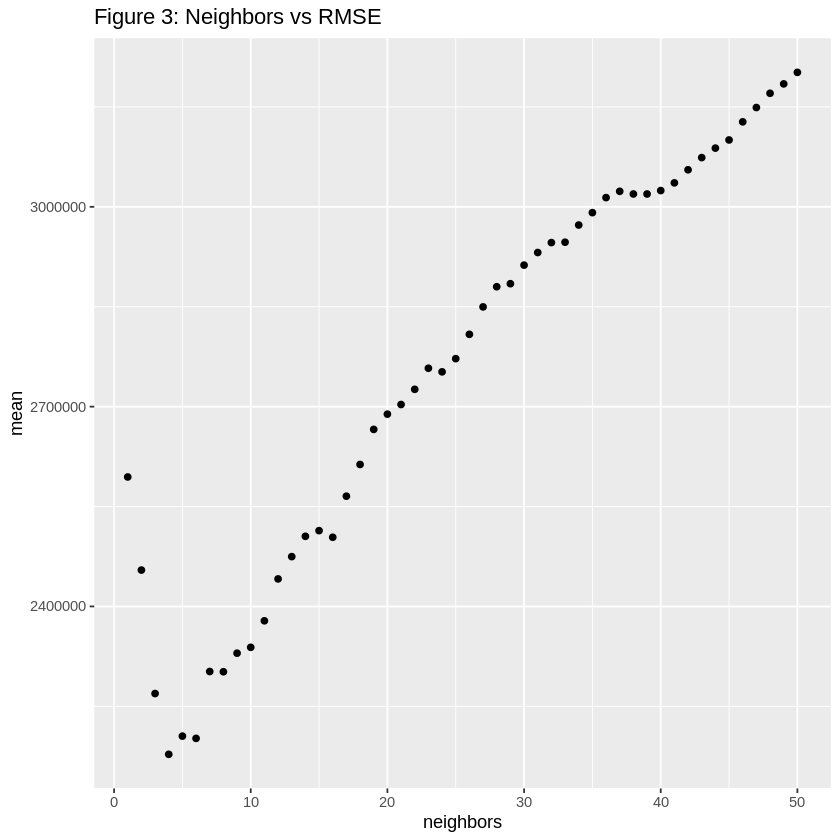

In [13]:
player_k_graph<-player_results%>%
    filter(.metric=="rmse")%>%
    select(neighbors,mean)%>%
    ggplot(aes(x=neighbors, y=mean))+
        geom_point() +
    ggtitle("Figure 3: Neighbors vs RMSE")

player_k_graph


In [14]:
player_min <- player_results %>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
    slice(1)

player_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,rmse,standard,2177962,5,304780.9,Model04


The k with the least rmse was 4, so we used 4 neighbors for our model. 

**Testing the Model**


To test our model, we applied it to our testing set of data.

In [15]:
k_min <- player_min %>%
          pull(neighbors)

player_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")

player_best_fit <- workflow() %>%
          add_recipe(player_recipe) %>%
          add_model(player_best_spec) %>%
          fit(data = player_stats_training)

player_estimate <- player_best_fit %>%
           predict(player_stats_testing) %>%
           bind_cols(player_stats_testing) 

head(player_estimate)

player_summary<- player_estimate%>%
           metrics(truth = Prize.Money, estimate = .pred)

player_summary

.pred,Prize.Money,Age,Current.Points,Peak.Elo.Rating,Seasons
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4656999.8,6091971,27,273,2037,11
2533063.0,1517157,22,1398,1983,5
2671118.5,1893476,19,1701,1992,3
2048132.5,2722314,22,1335,1999,6
4168125.0,10821168,33,417,2004,14
894810.2,631094,30,442,1721,3


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.446402e+07
rsq,standard,4.417984e-01
mae,standard,3.031663e+06


To visualize our estimations, we used ggplot to plot the predicted and actual prize money vs the various factors.

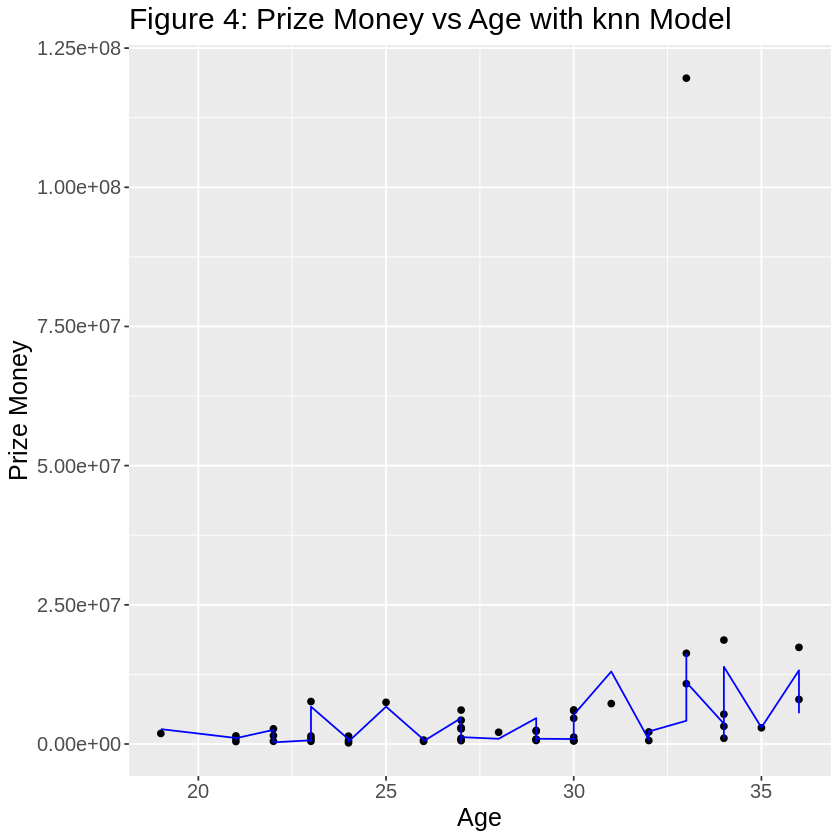

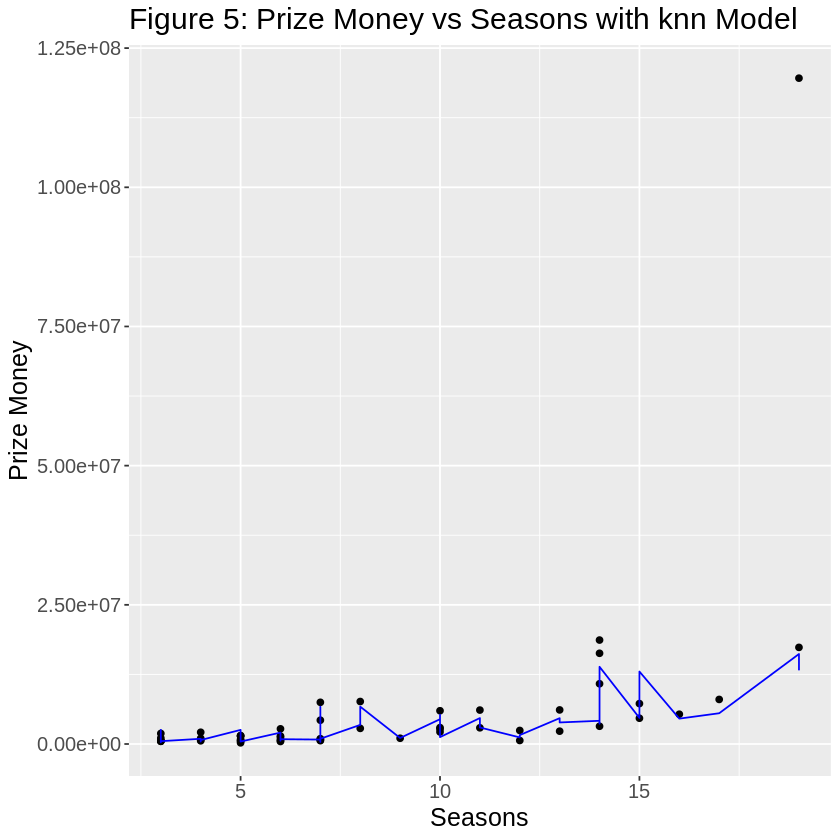

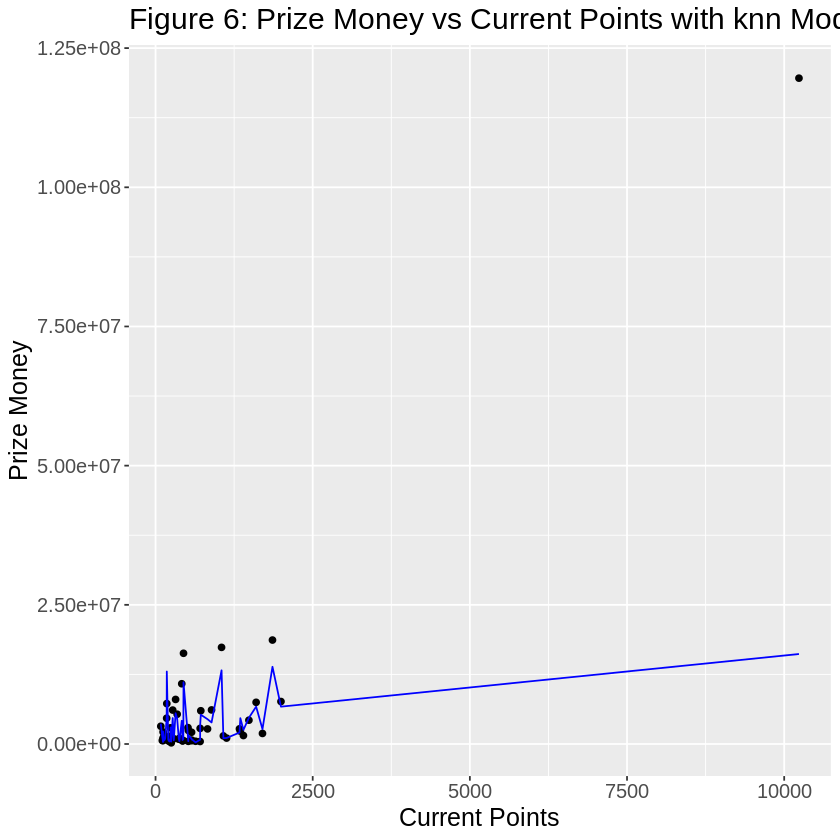

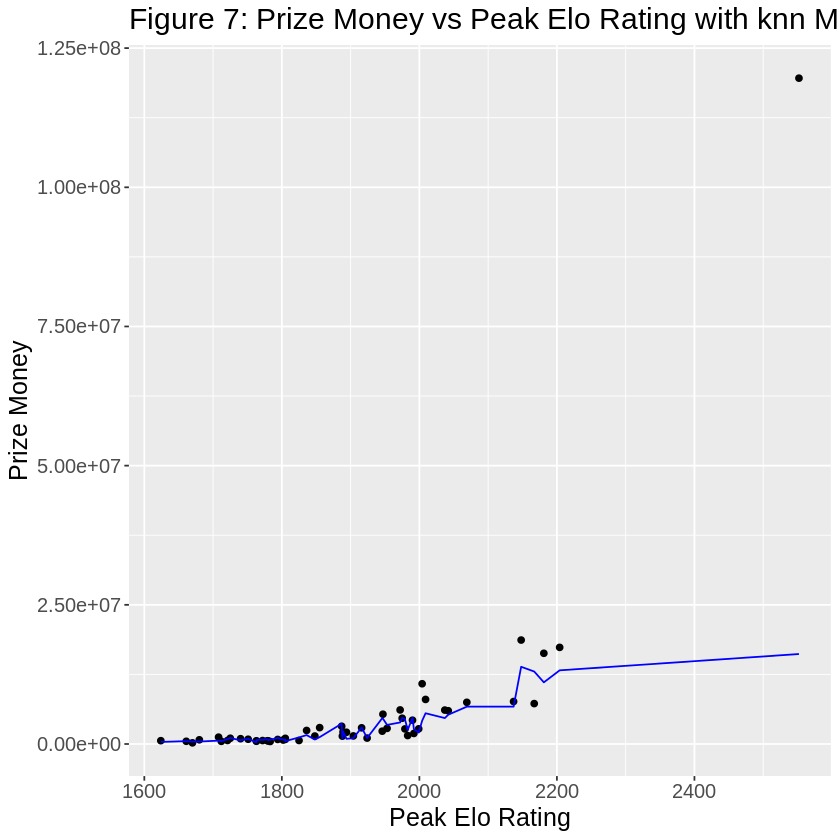

In [16]:

Age_knn_plot = ggplot(player_estimate, aes(x=Age, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Age, y = .pred), color = "blue")+
                labs(x="Age", y ="Prize Money", title = "Figure 4: Prize Money vs Age with knn Model") +
                theme(text = element_text(size = 15))
Age_knn_plot

Seasons_knn_plot = ggplot(player_estimate, aes(x=Seasons, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Seasons, y = .pred), color = "blue")+
                labs(x="Seasons", y ="Prize Money", title = "Figure 5: Prize Money vs Seasons with knn Model")+
                theme(text = element_text(size = 15))
Seasons_knn_plot

Current_Points_knn_plot = ggplot(player_estimate, aes(x=Current.Points, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Current.Points, y = .pred), color = "blue")+
                labs(x="Current Points", y ="Prize Money", title = "Figure 6: Prize Money vs Current Points with knn Model")+
                theme(text = element_text(size = 15))
Current_Points_knn_plot

Peak_Elo_Rating_knn_plot = ggplot(player_estimate, aes(x=Peak.Elo.Rating, y = Prize.Money))+
                geom_point()+
                geom_line(mapping = aes(x=Peak.Elo.Rating, y = .pred), color = "blue")+
                labs(x="Peak Elo Rating", y ="Prize Money", title = "Figure 7: Prize Money vs Peak Elo Rating with knn Model")+
                theme(text = element_text(size = 15))
Peak_Elo_Rating_knn_plot

**Creating a Linear Model**

We decided to also create a linear model to compare to our knn model. Using linear_reg, we created a recipe and workflow. 

In [17]:
lm_spec<-linear_reg()%>%
    set_engine("lm")%>%
    set_mode("regression")

lm_recipe<-recipe(Prize.Money~., data=player_stats_training)
    
lm_fit<-workflow()%>%
    add_recipe(lm_recipe)%>%
    add_model(lm_spec)%>%
    fit(player_stats_training)

lm_fit

lm_test_table <- lm_fit %>%
        predict(player_stats_testing) %>%
        bind_cols(player_stats_testing) 

lm_test_results<- lm_test_table%>%
    metrics(truth = Prize.Money, estimate = .pred)

lm_test_results

lm_rmspe <- lm_test_results %>%
         filter(.metric=='rmse') %>%
         select(.estimate) %>%
         pull()

lm_rmspe

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
    (Intercept)              Age   Current.Points  Peak.Elo.Rating  
      -30210098            14873             1553            15523  
        Seasons  
         331702  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.234817e+07
rsq,standard,7.369684e-01
mae,standard,3.332913e+06


[1] 12348165

**Visualizing the Linear Model**

To visualize our linear model, we used ggplot to plot the predicted prize money vs the various factors.

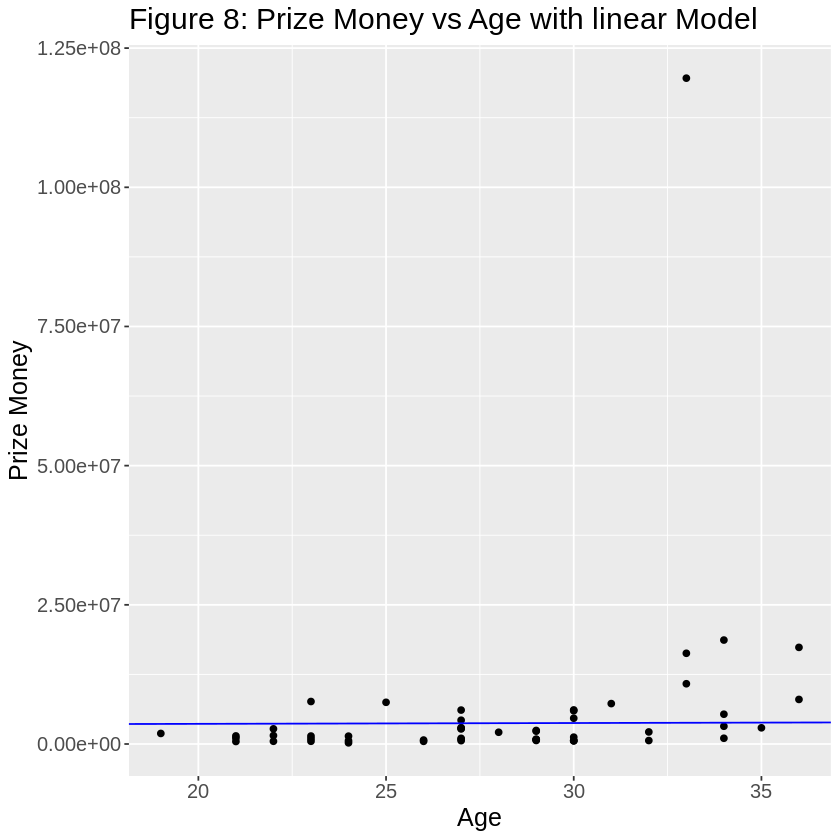

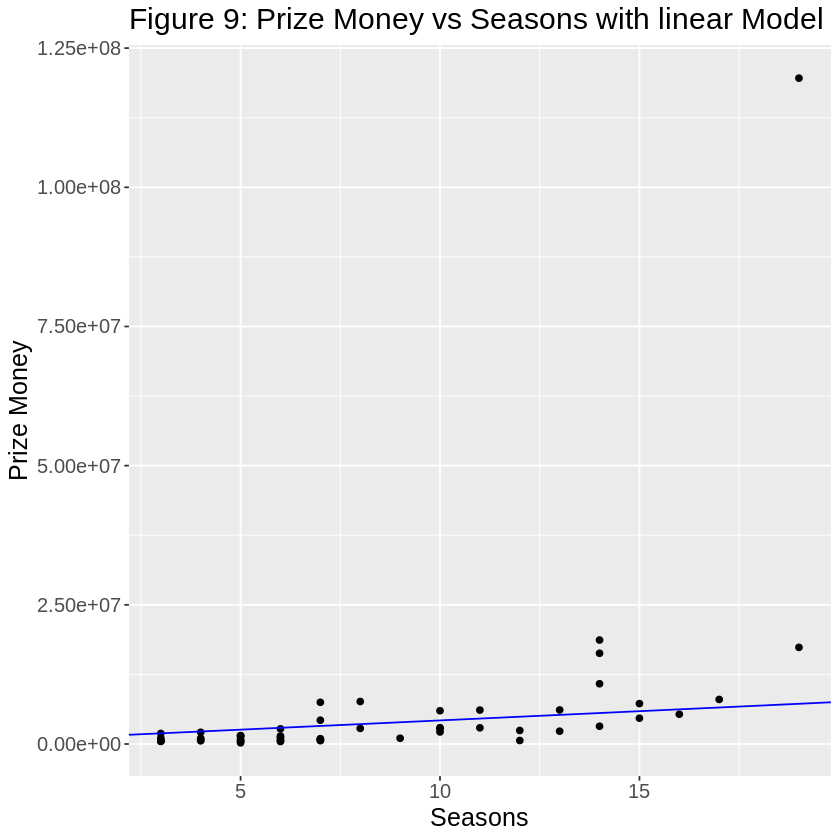

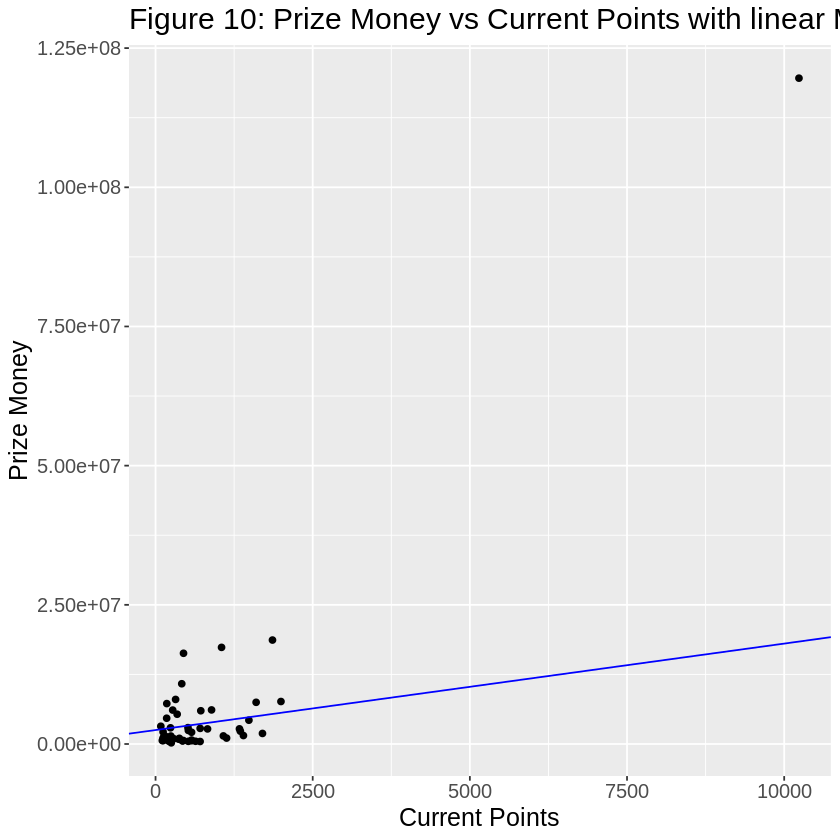

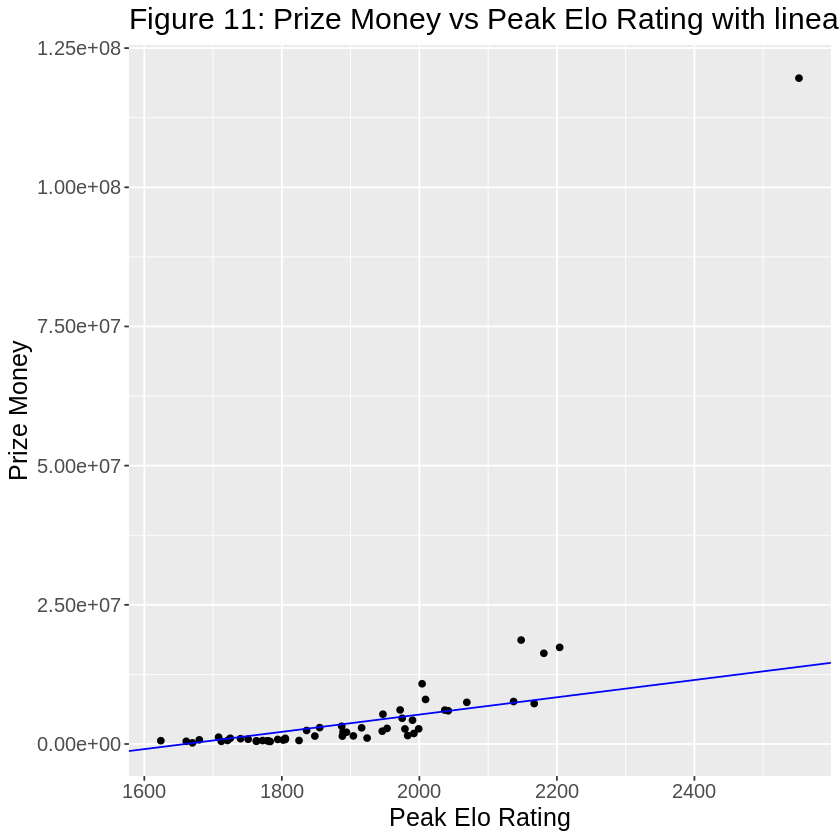

In [18]:
#Visualizing linear regression model on testing set
Age_mean = lm_test_table %>%
            summarise(Age_mean = mean(Age)) %>%
            pull()

Seasons_mean = lm_test_table %>%
            summarise(Seasons_mean = mean(Seasons)) %>%
            pull()

Current_Points_mean = lm_test_table %>%
            summarise(Current_Points_mean = mean(Current.Points)) %>%
            pull()

Peak_Elo_Rating_mean = lm_test_table %>%
            summarise(Peak_Elo_Rating_mean = mean(Peak.Elo.Rating)) %>%
            pull()
Age_slope = 14873
Seasons_slope = 331702
Current_Points_slope = 1553
Peak_Elo_Rating_slope = 15523



Age_linear_plot = ggplot(lm_test_table, aes(x=Age, y = Prize.Money))+
                geom_point()+
                geom_abline(intercept = -30210098 + Current_Points_slope*Current_Points_mean + Peak_Elo_Rating_slope*Peak_Elo_Rating_mean + Seasons_slope*Seasons_mean, slope = Age_slope, color = "blue")+
                labs(x="Age", y ="Prize Money", title = "Figure 8: Prize Money vs Age with linear Model") +
                theme(text = element_text(size = 15))
Age_linear_plot

Seasons_linear_plot = ggplot(lm_test_table, aes(x=Seasons, y = Prize.Money))+
                geom_point()+
                geom_abline(intercept = -30210098 + Current_Points_slope*Current_Points_mean + Peak_Elo_Rating_slope*Peak_Elo_Rating_mean + Age_slope*Age_mean, slope = Seasons_slope, color = "blue")+
                labs(x="Seasons", y ="Prize Money", title = "Figure 9: Prize Money vs Seasons with linear Model")+
                theme(text = element_text(size = 15))
Seasons_linear_plot
Current_Points_linear_plot = ggplot(lm_test_table, aes(x=Current.Points, y = Prize.Money))+
                geom_point()+
                geom_abline(intercept = -30210098 + Age_slope*Age_mean + Peak_Elo_Rating_slope*Peak_Elo_Rating_mean + Seasons_slope*Seasons_mean, slope = Current_Points_slope, color = "blue")+
                labs(x="Current Points", y ="Prize Money", title = "Figure 10: Prize Money vs Current Points with linear Model")+
                theme(text = element_text(size = 15))
Current_Points_linear_plot

Peak_Elo_Rating_linear_plot = ggplot(lm_test_table, aes(x=Peak.Elo.Rating, y = Prize.Money))+
                geom_point()+
                geom_abline(intercept = -30210098 + Current_Points_slope*Current_Points_mean + Age_slope*Age_mean + Seasons_slope*Seasons_mean, slope = Peak_Elo_Rating_slope, color = "blue")+
                labs(x="Peak Elo Rating", y ="Prize Money", title = "Figure 11: Prize Money vs Peak Elo Rating with linear Model")+
                theme(text = element_text(size = 15))
Peak_Elo_Rating_linear_plot

**Linear Formula**

Prize Money = Age * 14,873 + Current Points * 1553 + Peak Elo Rating * 15523 + Seasons * 331702 - 30,210,098
ex: Milos Raonic
Age: 29
Current Points: 2048
Peak Elo Rating: 2269
Seasons: 12

Prize Money estimate: 12,603,874 USD
Actual Amount: 18,879,855 USD

**Testing the Linear Model**


HTML widgets cannot be represented in plain text (need html)

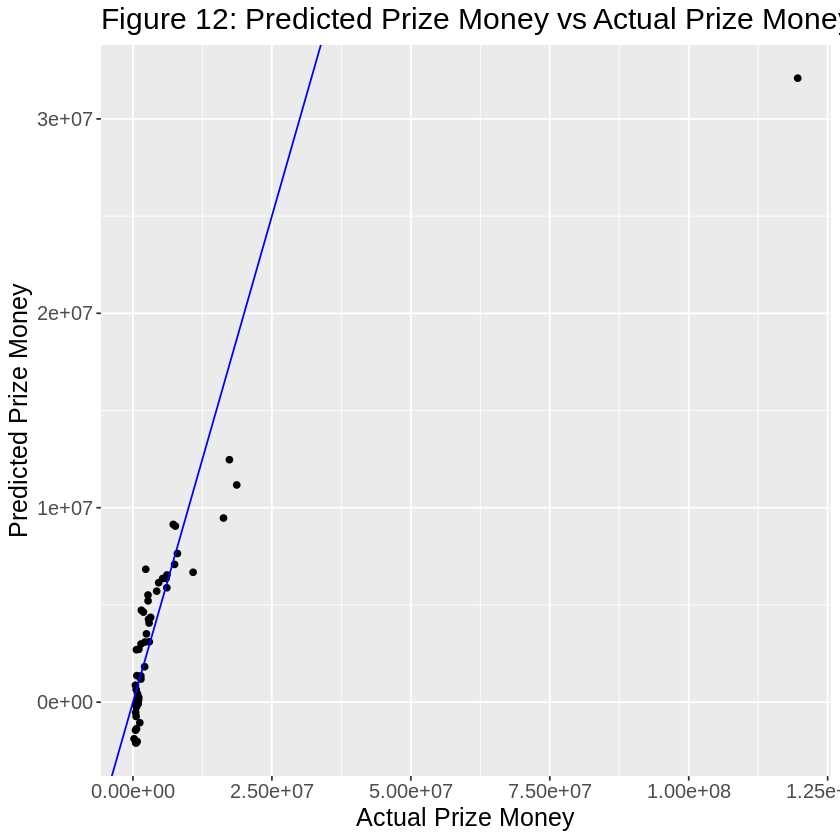

In [20]:
lm_test_table %>%
  DT::datatable(caption = "Table 1")

lm_plot<-lm_test_table%>%
    ggplot(aes(x=Prize.Money,y=.pred))+
    geom_point()+
    geom_abline(intercept = 0, slope = 1, color = "blue")+
    labs(x="Actual Prize Money", y ="Predicted Prize Money", title = "Figure 12: Predicted Prize Money vs Actual Prize Money")+
    theme(text = element_text(size = 15))

lm_plot

**Discussion**

Discussion:
    
    1.Summarize our findings:
        Just like we expected, "Prize money" has a positive relationship with all four factors("Age", "Seasons", "Current Points", "Peak Elo Rating").
        
        Looking at the four plots of the knn model, we choose k=4 as the final k since it has the least rmspe. We can find that "prize money" and "peak elo rating" has the most strong positive relationship in these four groups.
        The model knn makes for "prize money" and "current points" seems to have a strong positive linear relationship when the current point over 2500. However, we do not have enough data for the current point over 2500(only one exists when the current point goes over 2500), so this prediction is likely to be inaccurate.
        The model for "Prize Money" and "Seasons", "Prize Money" and "Age" is comparable to each other. Both models have large fluctuations and do not show linear relations. But when age and seasons increase, we could see prize money also increase slightly.
        
        The result would be similar when looking at the linear model. 
        Final formula for linear model is :Prize Money = Age*14873+Current Point *1533+Peak Elo Rating*15523+Seasons*331702-30210. In this formula, we can see that the coefficient in front of all the variables is positive, which means they have positive relations.
        "prize money" and "peak elo rating", "prize money" and "current points" two still shows strong linear positive relations. (it fluctuates slightly when the two variables are very small)
        "Prize Money" and "Seasons", "Prize Money" and "Age" still fluctuate a lot. But this time, prize money with seasons shows more positive relations.
        
     2. The impact of the findings:
         We could make predictions for any tennis players' prize money as long as they have those data(players' age, seasons that have been taken, current points, peak rating......). When a player knows his or her possible prize, this player will be motivated to perform better and can adjust their game strategy in time to achieve better results. A study which was done by Ou, Wei-Ming et al(2007)(1) has proved this theory: Wages are one of the best motivators for employees. We could consider prize money as wages, players as employees. In this case, this theory still holds for tennis players, and even other sports players.
         In addition, we can use data to predict the future performance of athletes. A similar kind of survey has done in 2011 by José L. Ruiz et al(2). They use DEA to assess tennis players. In their survey, we could see the feasibility of these predictions by using data to create models. Instead of assessing players, we could predict their final ranks by using data and making models.
         
     3. Further issues:
         We should find more data, especially for players' "current points" over 2500 and "peak elo rating" over 2200. Lake of data means that the model is inaccurate. More data means more accurate predictions. 
         In our model, we can conclude that  "prize money" and "peak elo rating", "prize money" and "current points"  have strong linear positive relations in case of only one point exists when the variable goes high. However, if we add more data, we may get different results.

**References**

Reference:
(1). Ou, Wei-Ming; Wang, Hong-Da.(Dec 2007) Controllability as a Moderator of the Effect of Salaries on Performance: An Empirical Study. International Journal of Management; Poole Vol. 24, Iss. 4. 657-666,822. https://www.proquest.com/openview/96e13a1ed72f0ee00b8473c15cec548e/1?pq-origsite=gscholar&cbl=5703
(2).Jose´ L. Ruiz1, Diego Pastor2, and Jesu´ s T. Pastor1(September 27, 2011) Assessing Professional Tennis Players Using Data Envelopment Analysis (DEA). https://doi.org/10.1177/1527002511421952
(3). Data we use: https://www.ultimatetennisstatistics.com/
     Data name: Player Stats for Top 500 Players